In [179]:
import pandas as pd

In [180]:
df = pd.read_csv('iris.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [181]:
# so for pca step 1 is to Standardize the Data
# by this it means that mean has to be zero and std deviation has to be 1,
# this is to basically fit everything in a range sort of

df_mean_std = df.describe().loc[['mean', 'std']]
df_mean_std_dict = df_mean_std.to_dict()

for feature in df_mean_std_dict.keys():
    mean = df_mean_std_dict[feature]['mean']
    std = df_mean_std_dict[feature]['std']
    
    df[f'z_score_{feature}'] = (df[feature] - mean) / std

# # cal_z_score('33')
# df_mean_std_dict
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,z_score_sepal_length,z_score_sepal_width,z_score_petal_length,z_score_petal_width
0,5.1,3.5,1.4,0.2,Iris-setosa,-0.897674,1.028611,-1.336794,-1.308593
1,4.9,3.0,1.4,0.2,Iris-setosa,-1.139200,-0.124540,-1.336794,-1.308593
2,4.7,3.2,1.3,0.2,Iris-setosa,-1.380727,0.336720,-1.393470,-1.308593
3,4.6,3.1,1.5,0.2,Iris-setosa,-1.501490,0.106090,-1.280118,-1.308593
4,5.0,3.6,1.4,0.2,Iris-setosa,-1.018437,1.259242,-1.336794,-1.308593


In [182]:
#now if u describe the mean should be 0 and std should be 1 for all z_score features
df.describe()
# for output the mean is not showing exactly as zero mostly due to floating-point arithmetic error

,sepal_length,sepal_width,petal_length,petal_width,z_score_sepal_length,z_score_sepal_width,z_score_petal_length,z_score_petal_width
count,150.000000,150.000000,150.000000,150.000000,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02
mean,5.843333,3.054000,3.758667,1.198667,-5.684342e-16,-6.158037e-16,1.894781e-16,-1.894781e-16
std,0.828066,0.433594,1.764420,0.763161,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,4.300000,2.000000,1.000000,0.100000,-1.863780e+00,-2.430844e+00,-1.563497e+00,-1.439627e+00
25%,5.100000,2.800000,1.600000,0.300000,-8.976739e-01,-5.858010e-01,-1.223442e+00,-1.177559e+00
50%,5.800000,3.000000,4.350000,1.300000,-5.233076e-02,-1.245404e-01,3.351431e-01,1.327811e-01
75%,6.400000,3.300000,5.100000,1.800000,6.722490e-01,5.673506e-01,7.602119e-01,7.879511e-01
max,7.900000,4.400000,6.900000,2.500000,2.483699e+00,3.104284e+00,1.780377e+00,1.705189e+00


In [183]:
# next step get covariance matrix which will basically tell how related the features are- 
# ok so basically i have to do say covariance(x ,  y) 
# so it would be sum of ((x - x mean)(y - y mean))/(n-1) where n = count of data points
import numpy as np

def get_deviation_product(x, xmean, y, ymean, n):
    return ((x-xmean)(y-ymean))/n-1
    # say 2 features, F1 and F2 have data points a,b,c and p,q,r respectively and means X and Y respectively
    # so we have to do : (a - X)(p-Y) + (b - X)(q-Y) ... / 3 - 1 (since we have 3 data points in each column, a,b,c and p,q.r)
    # but in pca we have to use z score instead of data points
    # since the mean of Z-scores is 0 the formula simply becaomes : (Z_f1 * Z_f2) /(n-1)

feature_count = len(df_mean_std_dict.keys())
cov_matrix = np.zeros((feature_count, feature_count))

cov_df = pd.DataFrame()

keys = df_mean_std_dict.keys()
keys = list(keys)

# for x in range(len(df_mean_std_dict.keys())):
#     feature_1 = keys[x]
#     feature_1_mean = mean = df_mean_std_dict[feature_1]['mean']
#     for y in range(len(df_mean_std_dict.keys())):
#         feature_2 = keys[y]
#         feature_2_mean = mean = df_mean_std_dict[feature_2]['mean']
#         # cov_matrix[x,y] = sum( (df[feature_1] -feature_1_mean)* (df[feature_2] - feature_2_mean) /  len(df) - 1)
#         x_xmean = np.array(df[feature_1] -feature_1_mean)
#         y_ymean = np.array(df[feature_2] - feature_2_mean)
#         n_1 =  len(df) - 1
#         # print(np.multiply(x_xmean, y_ymean))
#         print(x_xmean)

for x in range(len(df_mean_std_dict.keys())):
    feature_1 = keys[x]
    for y in range(len(df_mean_std_dict.keys())):
        feature_2 = keys[y]

        cov_df[f'{feature_1}_{feature_2}'] = ((df[f'z_score_{feature_1}'] ) * (df[f'z_score_{feature_2}'] )) 

        cov_f1_f2 = np.sum(list( cov_df[f'{feature_1}_{feature_2}']))
        cov_matrix[x,y] = cov_f1_f2/ (len(df) - 1)

cov_matrix

#next up we need eigen values and vectors for our PCA
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
eigenvalues, eigenvectors

# Eigenvalues  represent the amount of variance captured by each corresponding Eigenvector (Principal Component)
# generally we pick top 2 eigen values and their corresponding eigen vector

# so like in our case we got eigen values as : [2.81216437, 0.98783338, 0.19409673, 0.00590552]
# and eigen vector as [
#       [ 0.55457884, -0.10593625, -0.79849063,  0.20888401],
#       [-0.09432802, -0.99316039,  0.05566964, -0.04044197],
#       [ 0.59264566, -0.01286038,  0.20992028, -0.7775212 ],
#       [ 0.57646826, -0.04737677,  0.56146868,  0.59177082],
# ]
# we had 4 features, hence we got 4 eigen values, and we will pick top 2 to get PC1 and PC2.
# basially we reduced 4 features into 2


(array([2.91081808, 0.92122093, 0.14735328, 0.02060771]),
 array([[ 0.52237162, -0.37231836, -0.72101681,  0.26199559],
        [-0.26335492, -0.92555649,  0.24203288, -0.12413481],
        [ 0.58125401, -0.02109478,  0.14089226, -0.80115427],
        [ 0.56561105, -0.06541577,  0.6338014 ,  0.52354627]]))

In [184]:
import numpy as np

total_variance = np.sum(eigenvalues)
# lets see how much variation each pc captured.
perc_pc1 = (eigenvalues[0] / total_variance) * 100
perc_pc2 = (eigenvalues[1] / total_variance) * 100

print(f"PC1 explains: {perc_pc1:.2f}% of variance")
print(f"PC2 explains: {perc_pc2:.2f}% of variance")

# # Getting respective eigen vectors
# # Select the first two columns, which are PC1 and PC2
# V_k = eigenvectors[:, :2] 

# # Projectinig the Standardized Data to get the Final Scores
# # Matrix multiplication: (150x4) dot (4x2) = (150x2)
# PC_scores = np.dot(df[[f'z_score_{feature}' for feature in df_mean_std_dict.keys()]], V_k)
V_all = eigenvectors  # Use all eigenvectors
PC_scores_all = np.dot(df[[f'z_score_{feature}' for feature in df_mean_std_dict.keys()]], V_all)

# Keep your original PC_scores for the first plot
PC_scores = PC_scores_all[:, :2]
PC1_scores = PC_scores[:, 0]
PC2_scores = PC_scores[:, 1]

# PC1_scores = PC_scores[:, 0]
# PC2_scores = PC_scores[:, 1]

PC1 explains: 72.77% of variance
PC2 explains: 23.03% of variance


--- Principal Component 1 (PC1) ---
sepal_length   : +0.5224
sepal_width    : -0.2634
petal_length   : +0.5813
petal_width    : +0.5656

--- Principal Component 2 (PC2) ---
sepal_length   : -0.3723
sepal_width    : -0.9256
petal_length   : -0.0211
petal_width    : -0.0654


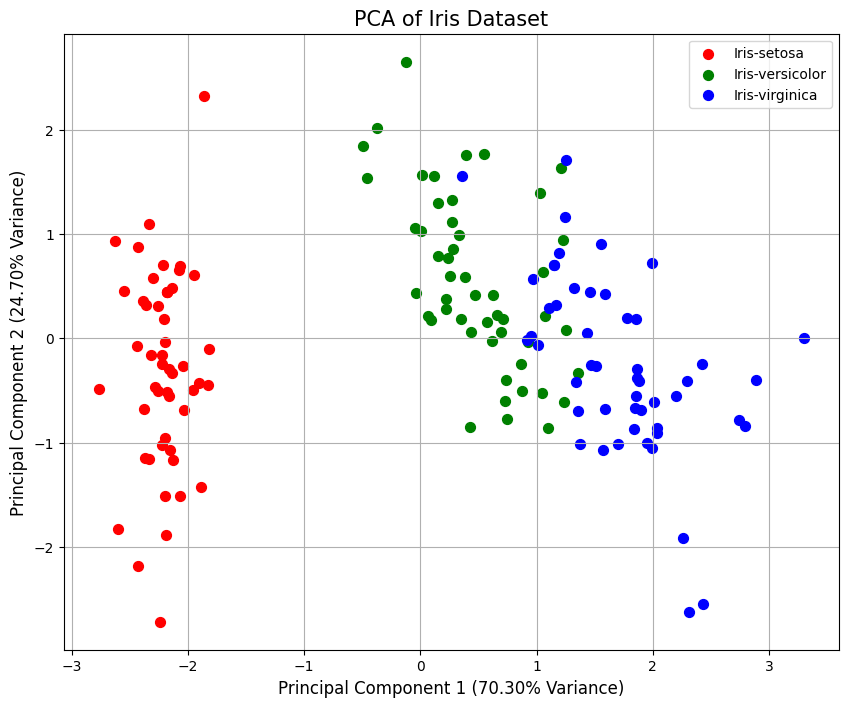

In [185]:
# 1. Prepare Data for Plotting (creating a temporary DataFrame is often easiest)
plot_df = pd.DataFrame(data = {'PC1': PC1_scores, 'PC2': PC2_scores})
plot_df['species'] = df['species'] 

plt.figure(figsize=(10, 8))

# Define colors for the three species (for clear separation)
targets = plot_df['species'].unique()
colors = ['r', 'g', 'b'] 

# Loop through each species to plot them with a unique color
for target, color in zip(targets, colors):
    indices_to_plot = plot_df['species'] == target
    
    plt.scatter(
        plot_df.loc[indices_to_plot, 'PC1'], 
        plot_df.loc[indices_to_plot, 'PC2'], 
        c=color, 
        s=50, 
        label=target
    )

# Label the axes with the variance captured (crucial for demonstration)
xlabel = f'Principal Component 1 ({variance_explained_PC1:.2f}% Variance)'
ylabel = f'Principal Component 2 ({variance_explained_PC2:.2f}% Variance)'
feature_names = keys
print("--- Principal Component 1 (PC1) ---")
pc1_loadings = eigenvectors[:, 0]
for name, loading in zip(feature_names, pc1_loadings):
    print(f"{name:<15}: {loading:+.4f}")

print("\n--- Principal Component 2 (PC2) ---")
pc2_loadings = eigenvectors[:, 1]
for name, loading in zip(feature_names, pc2_loadings):
    print(f"{name:<15}: {loading:+.4f}")

plt.xlabel(xlabel, fontsize=12)
plt.ylabel(ylabel, fontsize=12)
plt.title('PCA of Iris Dataset', fontsize=15)
plt.legend(loc='best')
plt.grid()
plt.show()

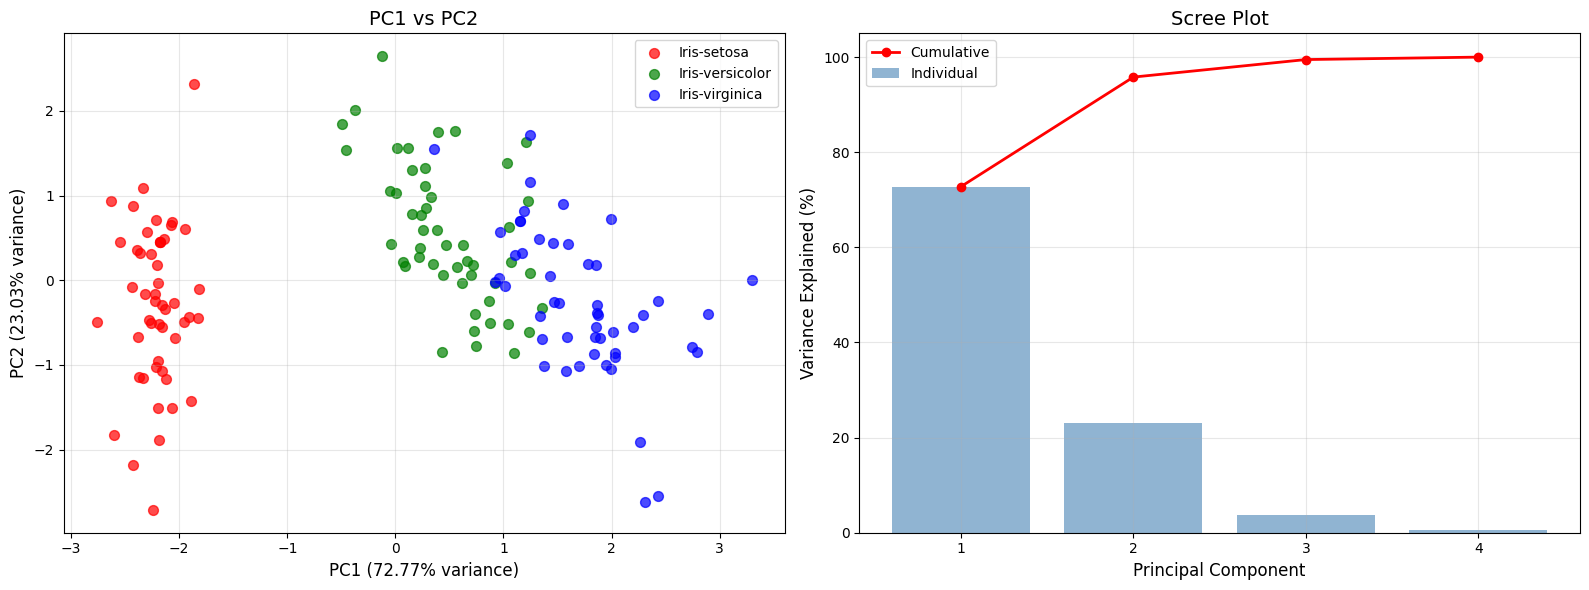

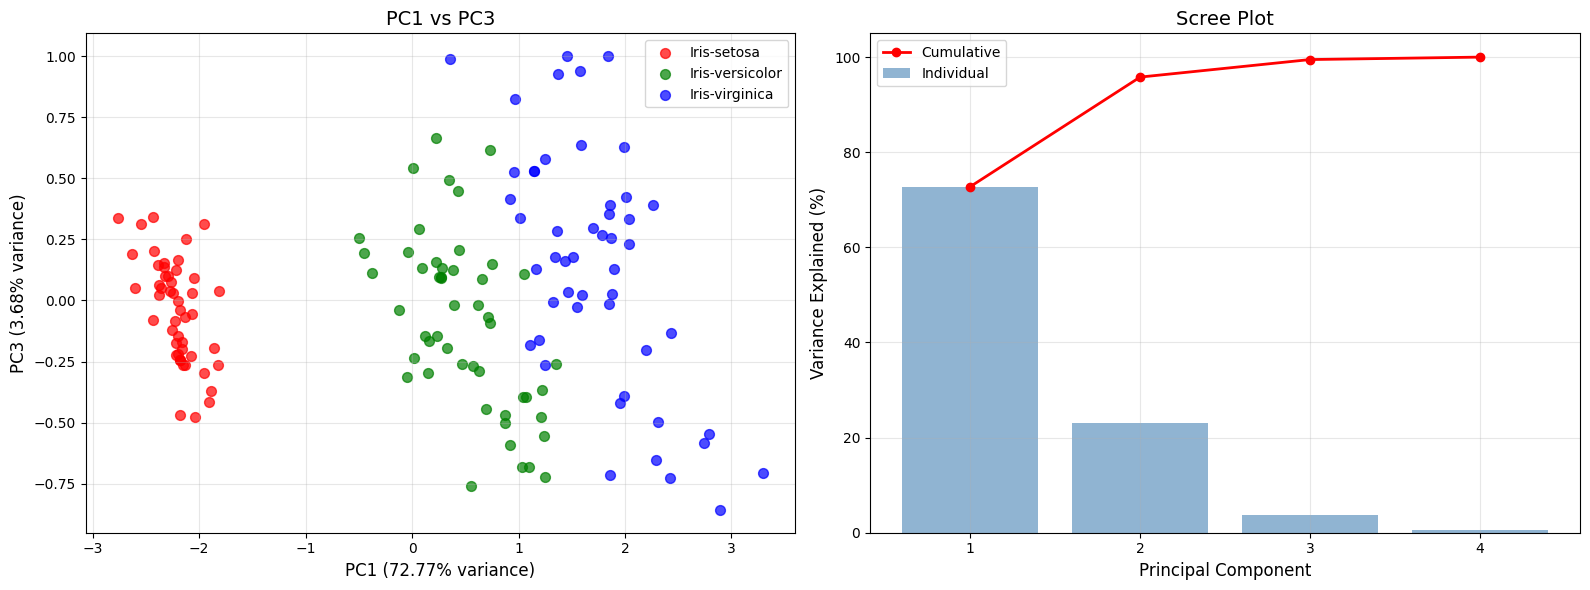

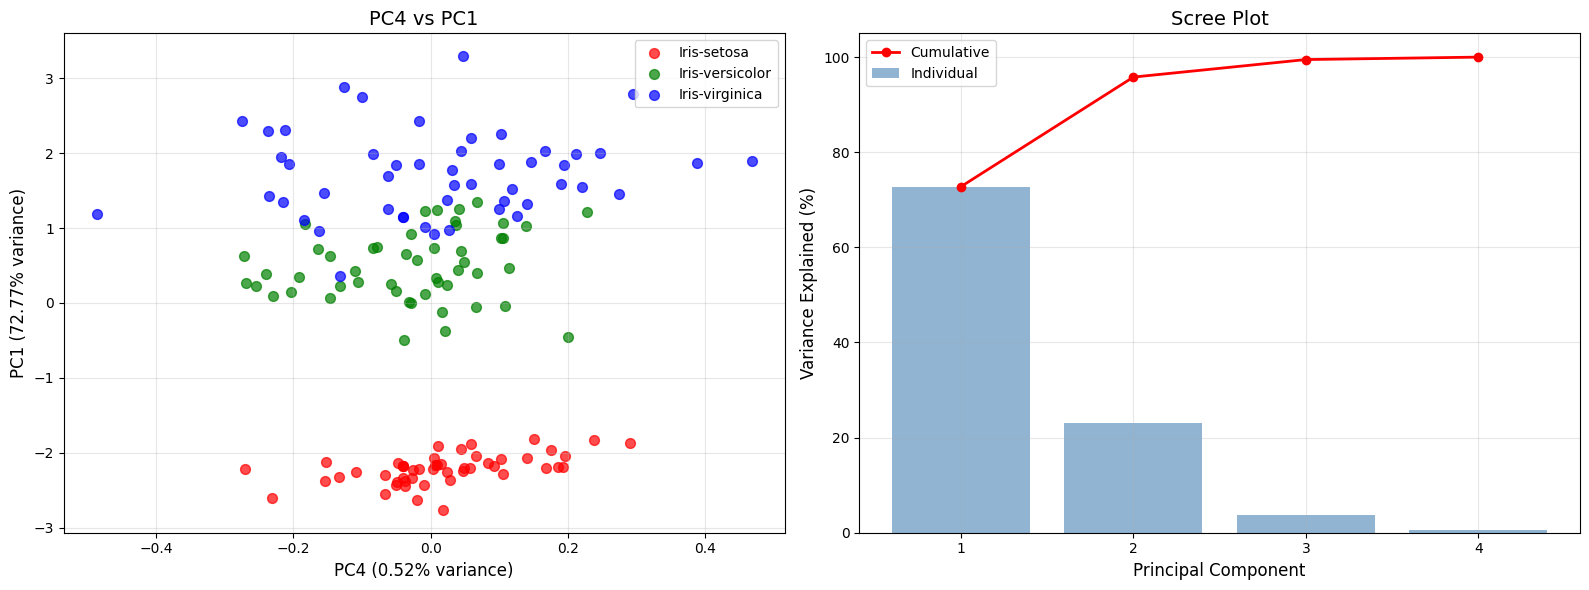

In [186]:
# Cell: Component selector and variance plot
import matplotlib.pyplot as plt

def plot_pca_with_component_selector(pc_pair=(0, 1)):
    """Plot any pair of principal components"""
    pc_x, pc_y = pc_pair
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

    # total_variance = np.sum(eigenvalues)

    # perc_pc1 = (eigenvalues[pc_x] / total_variance) * 100
    # perc_pc2 = (eigenvalues[pc_y] / total_variance) * 100

    # print(f"PC1 explains: {perc_pc1:.2f}% of variance")
    # print(f"PC2 explains: {perc_pc2:.2f}% of variance")

    # Getting respective eigen vectors
    # Select the first two columns, which are PC1 and PC2
    # V_k = eigenvectors[:, :2] 

    # # Projectinig the Standardized Data to get the Final Scores
    # # Matrix multiplication: (150x4) dot (4x2) = (150x2)
    # PC_scores = np.dot(df[[f'z_score_{feature}' for feature in df_mean_std_dict.keys()]], V_k)

    # Left plot: Selected PC pair
    PC_x_scores = PC_scores_all[:, pc_x]  # Changed from PC_scores
    PC_y_scores = PC_scores_all[:, pc_y]  # Changed from PC_scores
    
    plot_df_temp = pd.DataFrame({
        f'PC{pc_x+1}': PC_x_scores, 
        f'PC{pc_y+1}': PC_y_scores,
        'species': df['species']
    })
    
    targets = plot_df_temp['species'].unique()
    colors = ['r', 'g', 'b']
    
    for target, color in zip(targets, colors):
        indices = plot_df_temp['species'] == target
        ax1.scatter(
            plot_df_temp.loc[indices, f'PC{pc_x+1}'], 
            plot_df_temp.loc[indices, f'PC{pc_y+1}'], 
            c=color, s=50, label=target, alpha=0.7
        )
    
    var_x = (eigenvalues[pc_x] / total_variance) * 100
    var_y = (eigenvalues[pc_y] / total_variance) * 100
    
    ax1.set_xlabel(f'PC{pc_x+1} ({var_x:.2f}% variance)', fontsize=12)
    ax1.set_ylabel(f'PC{pc_y+1} ({var_y:.2f}% variance)', fontsize=12)
    ax1.set_title(f'PC{pc_x+1} vs PC{pc_y+1}', fontsize=14)
    ax1.legend()
    ax1.grid(alpha=0.3)
    
    # Right plot: Scree plot
    variance_explained = (eigenvalues / total_variance) * 100
    cumulative_variance = np.cumsum(variance_explained)
    
    x_pos = np.arange(1, len(eigenvalues) + 1)
    ax2.bar(x_pos, variance_explained, alpha=0.6, color='steelblue', label='Individual')
    ax2.plot(x_pos, cumulative_variance, 'ro-', linewidth=2, label='Cumulative')
    
    ax2.set_xlabel('Principal Component', fontsize=12)
    ax2.set_ylabel('Variance Explained (%)', fontsize=12)
    ax2.set_title('Scree Plot', fontsize=14)
    ax2.set_xticks(x_pos)
    ax2.legend()
    ax2.grid(alpha=0.3)
    
    plt.tight_layout()
    plt.show()

# Try different component pairs
plot_pca_with_component_selector((0, 1))  # PC1 vs PC2
plot_pca_with_component_selector((0, 2))  # PC1 vs PC3
plot_pca_with_component_selector((3, 0))  # PC2 vs PC3

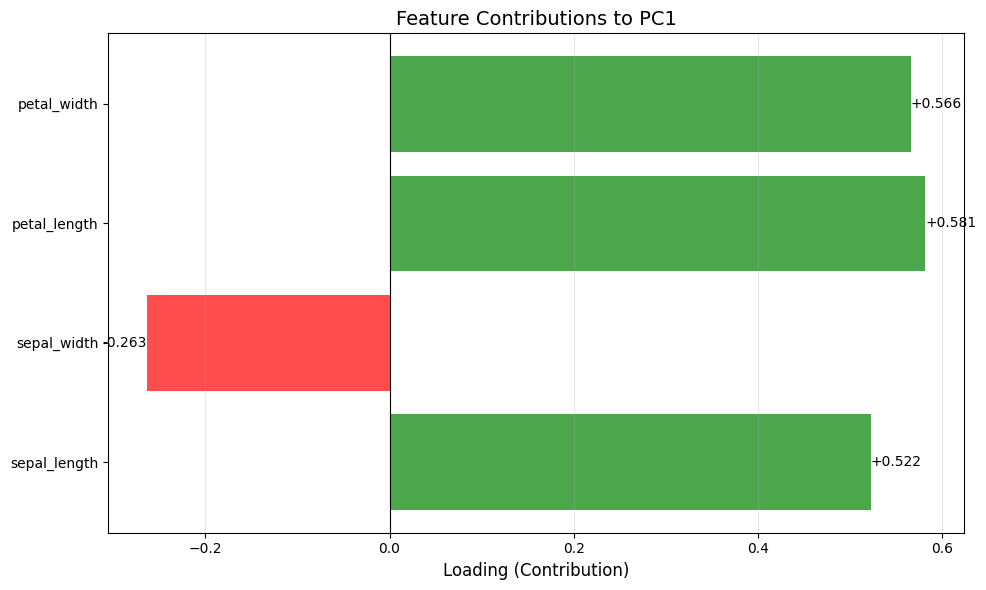

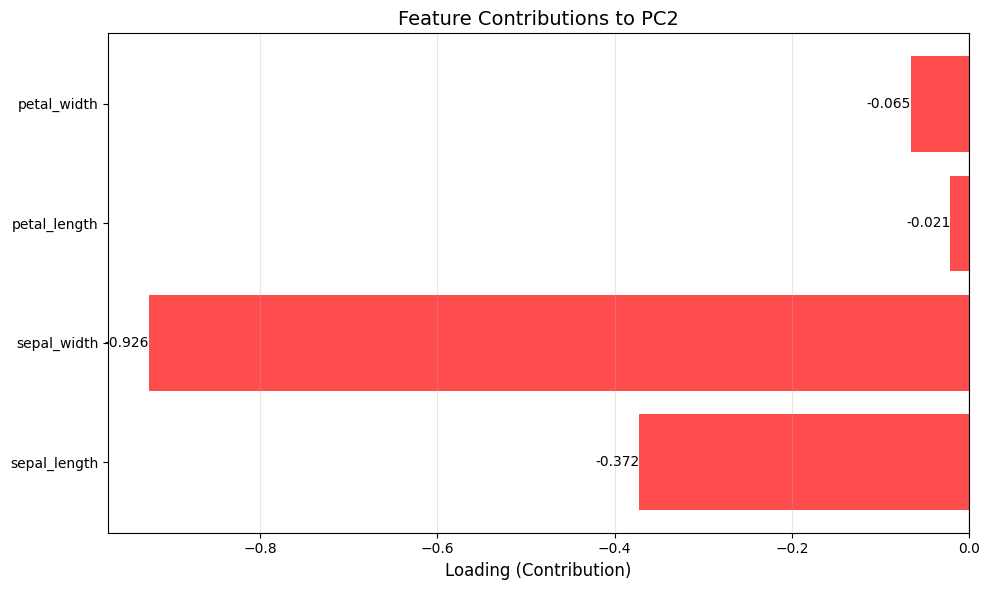

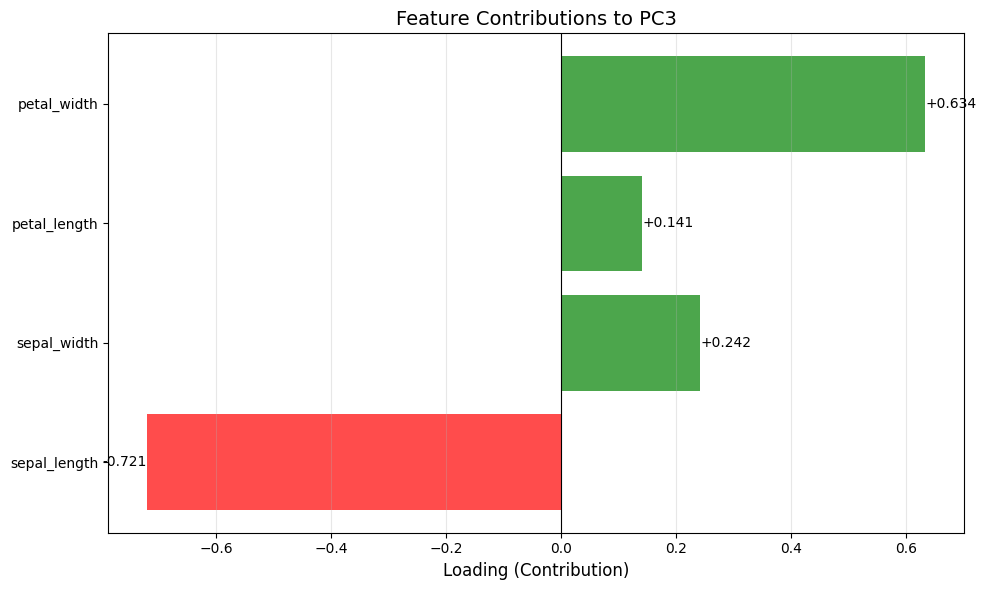

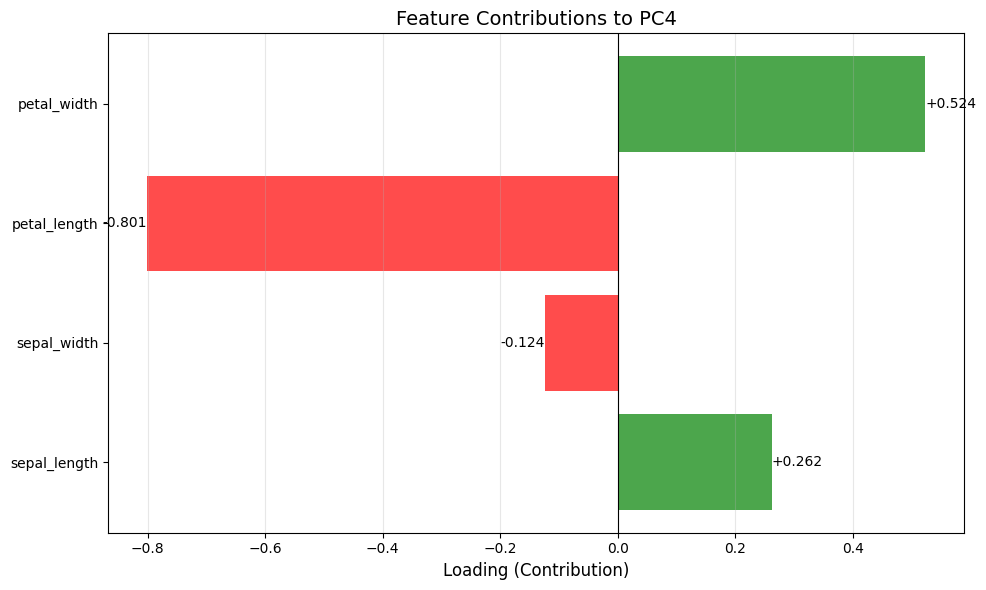

In [187]:
# Cell: Feature contributions (loadings) bar chart
def plot_feature_contributions(pc_index=0):
    """Show how much each original feature contributes to a PC"""
    fig, ax = plt.subplots(figsize=(10, 6))
    
    loadings = eigenvectors[:, pc_index]
    feature_names = list(keys)
    
    colors = ['green' if x > 0 else 'red' for x in loadings]
    bars = ax.barh(feature_names, loadings, color=colors, alpha=0.7)
    
    ax.set_xlabel('Loading (Contribution)', fontsize=12)
    ax.set_title(f'Feature Contributions to PC{pc_index+1}', fontsize=14)
    ax.axvline(x=0, color='black', linewidth=0.8)
    ax.grid(alpha=0.3, axis='x')
    
    # Add value labels
    for bar, value in zip(bars, loadings):
        ax.text(value, bar.get_y() + bar.get_height()/2, 
                f'{value:+.3f}', va='center', 
                ha='left' if value > 0 else 'right', fontsize=10)
    
    plt.tight_layout()
    plt.show()

# Show contributions for each PC
for i in range(len(eigenvalues)):
    plot_feature_contributions(i)

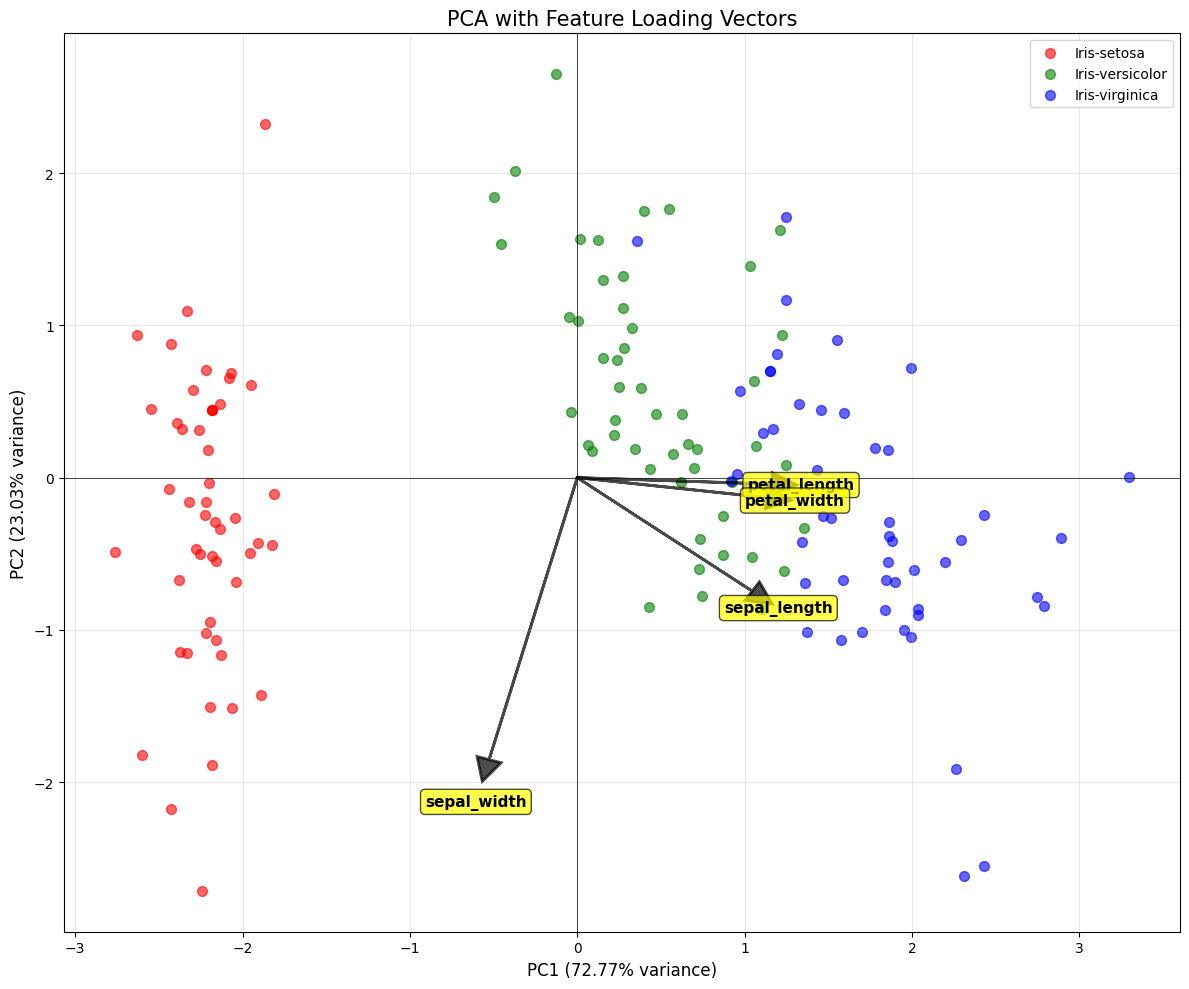

In [188]:
# Cell: Scatter plot with loading vectors overlay
def plot_with_loading_vectors():
    """Show PCA scatter with arrows indicating original feature directions"""
    fig, ax = plt.subplots(figsize=(12, 10))
    
    # Scatter plot
    targets = plot_df['species'].unique()
    colors = ['r', 'g', 'b']
    
    for target, color in zip(targets, colors):
        indices = plot_df['species'] == target
        ax.scatter(
            plot_df.loc[indices, 'PC1'], 
            plot_df.loc[indices, 'PC2'], 
            c=color, s=50, label=target, alpha=0.6
        )
    
    # Loading vectors (scaled for visibility)
    scale_factor = 2  # Adjust this to make arrows more visible
    feature_names = list(keys)
    
    for i, feature in enumerate(feature_names):
        # PC1 loading is first column, PC2 loading is second column
        ax.arrow(0, 0, 
                eigenvectors[i, 0] * scale_factor, 
                eigenvectors[i, 1] * scale_factor,
                head_width=0.15, head_length=0.15, 
                fc='black', ec='black', linewidth=2, alpha=0.7)
        
        # Add feature labels at arrow tips
        ax.text(eigenvectors[i, 0] * scale_factor * 1.15, 
               eigenvectors[i, 1] * scale_factor * 1.15,
               feature, fontsize=11, fontweight='bold',
               ha='center', va='center',
               bbox=dict(boxstyle='round,pad=0.3', facecolor='yellow', alpha=0.7))
    
    ax.set_xlabel(f'PC1 ({perc_pc1:.2f}% variance)', fontsize=12)
    ax.set_ylabel(f'PC2 ({perc_pc2:.2f}% variance)', fontsize=12)
    ax.set_title('PCA with Feature Loading Vectors', fontsize=15)
    ax.legend(loc='best')
    ax.grid(alpha=0.3)
    ax.axhline(y=0, color='k', linewidth=0.5)
    ax.axvline(x=0, color='k', linewidth=0.5)
    
    plt.tight_layout()
    plt.show()

plot_with_loading_vectors()